In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.options.display.float_format = '{:.5f}'.format

In [3]:
traind = pd.read_csv('train.csv')

In [4]:
traind

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,TRAIN_00000,자가,1941337.50000,10년 이상,0.00000,9,13.40000,400597.50000,0,24,1,부채 통합,단기 상환,390903.00000,225457.50000,8806.50000,767,0
1,TRAIN_00001,월세,1979505.00000,10년 이상,0.00000,5,15.10000,360679.50000,0,11,0,부채 통합,단기 상환,1002184.50000,64749.00000,24961.50000,767,0
2,TRAIN_00002,월세,1356381.00000,4년,0.00000,12,18.80000,491770.50000,1,74,3,부채 통합,단기 상환,227775.00000,487644.00000,12069.00000,800,1
3,TRAIN_00003,월세,1049017.50000,6년,0.00000,15,14.80000,411546.00000,1,22,1,부채 통합,단기 상환,251383.50000,413211.00000,31749.00000,796,1
4,TRAIN_00004,월세,4320217.50000,2년,0.00000,11,26.10000,895288.50000,0,32,0,부채 통합,장기 상환,1163176.50000,78991.50000,5862.00000,751,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TRAIN_09995,주택 담보 대출 (거주 중),1339473.00000,10년 이상,0.00000,9,18.70000,319027.50000,0,68,0,부채 통합,단기 상환,126216.00000,177028.50000,6237.00000,755,0
9996,TRAIN_09996,주택 담보 대출 (거주 중),2297230.50000,2년,0.00000,11,28.30000,399799.50000,0,7,0,주택 개보수,장기 상환,371907.00000,347449.50000,53301.00000,707,0
9997,TRAIN_09997,주택 담보 대출 (거주 중),1221523.50000,10년 이상,0.00000,9,30.10000,823305.00000,0,14,0,부채 통합,장기 상환,869736.00000,176905.50000,11436.00000,733,0
9998,TRAIN_09998,자가,3343584.00000,10년 이상,0.00000,10,20.30000,724314.00000,0,25,0,부채 통합,단기 상환,443008.50000,139294.50000,25567.50000,696,0


데이터를 확인했을 때 주거형태, 근속연수, 대출목적, 상환기관은 바꿀 필요가 있어 보인다.

In [5]:
traind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  object 
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float64
 15  월 상환 부채액           10000 non-null  float64
 16  신용 점수              1000

info를 확인했을 때 na가 없어 보인다. 또한 데이터타입이 object인 것들도 확인. UID의 경우 따로 변경할 필요가 없음.

In [6]:
traind.isna().sum()

UID                  0
주거 형태                0
연간 소득                0
현재 직장 근속 연수          0
체납 세금 압류 횟수          0
개설된 신용계좌 수           0
신용 거래 연수             0
최대 신용한도              0
신용 문제 발생 횟수          0
마지막 연체 이후 경과 개월 수    0
개인 파산 횟수             0
대출 목적                0
대출 상환 기간             0
현재 대출 잔액             0
현재 미상환 신용액           0
월 상환 부채액             0
신용 점수                0
채무 불이행 여부            0
dtype: int64

In [7]:
traind['주거 형태'].unique()

array(['자가', '월세', '주택 담보 대출 (거주 중)', '주택 담보 대출 (비거주 중)'], dtype=object)

In [8]:
traind['현재 직장 근속 연수'].unique()

array(['10년 이상', '4년', '6년', '2년', '8년', '3년', '5년', '9년', '7년', '1년 미만',
       '1년'], dtype=object)

In [9]:
traind['대출 목적'].unique()

array(['부채 통합', '자동차 구매', '기타', '사업 대출', '주택 개보수', '여행 자금', '소규모 사업 자금',
       '교육비', '의료비', '고액 구매', '결혼 자금', '휴가 비용', '주택 구매', '이사 비용'],
      dtype=object)

In [10]:
traind['대출 상환 기간'].unique()

array(['단기 상환', '장기 상환'], dtype=object)

데이터타입이 object인 변수들이 어떤 값이 있는지 확인해봤다.\
대출 목적, 주거 형태인 경우 라벨인코딩 했을 경우 모델링 할 때 문제가 생길거같다.

In [11]:
traind.columns

Index(['UID', '주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       '채무 불이행 여부'],
      dtype='object')

In [12]:
traind_c = traind.copy()

In [13]:
train_num = traind_c[['연간 소득', '체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       '채무 불이행 여부']]

In [14]:
train_num

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,1941337.50000,0.00000,9,13.40000,400597.50000,0,24,1,390903.00000,225457.50000,8806.50000,767,0
1,1979505.00000,0.00000,5,15.10000,360679.50000,0,11,0,1002184.50000,64749.00000,24961.50000,767,0
2,1356381.00000,0.00000,12,18.80000,491770.50000,1,74,3,227775.00000,487644.00000,12069.00000,800,1
3,1049017.50000,0.00000,15,14.80000,411546.00000,1,22,1,251383.50000,413211.00000,31749.00000,796,1
4,4320217.50000,0.00000,11,26.10000,895288.50000,0,32,0,1163176.50000,78991.50000,5862.00000,751,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1339473.00000,0.00000,9,18.70000,319027.50000,0,68,0,126216.00000,177028.50000,6237.00000,755,0
9996,2297230.50000,0.00000,11,28.30000,399799.50000,0,7,0,371907.00000,347449.50000,53301.00000,707,0
9997,1221523.50000,0.00000,9,30.10000,823305.00000,0,14,0,869736.00000,176905.50000,11436.00000,733,0
9998,3343584.00000,0.00000,10,20.30000,724314.00000,0,25,0,443008.50000,139294.50000,25567.50000,696,0


In [15]:
num_corr = train_num.corr()

In [16]:
num_corr

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
연간 소득,1.00000,0.09011,0.20156,0.30890,0.37792,0.05568,-0.06539,-0.01734,0.40332,0.33692,0.41663,0.04549,-0.12050
체납 세금 압류 횟수,0.09011,1.00000,0.01327,0.09049,-0.03161,0.51027,0.13239,0.22504,0.10932,-0.06990,0.02261,-0.00715,-0.03042
개설된 신용계좌 수,0.20156,0.01327,1.00000,0.13998,0.27173,0.06667,-0.04385,0.13870,0.16838,0.25022,0.29218,0.07961,0.16990
신용 거래 연수,0.30890,0.09049,0.13998,1.00000,0.27528,0.12811,-0.04834,0.13362,0.23353,0.18689,0.23262,0.11642,-0.10886
최대 신용한도,0.37792,-0.03161,0.27173,0.27528,1.00000,-0.09289,-0.11955,-0.11628,0.36126,0.39210,0.37935,0.04976,-0.04500
신용 문제 발생 횟수,0.05568,0.51027,0.06667,0.12811,-0.09289,1.00000,0.22721,0.60012,0.01706,-0.09304,-0.02460,0.06553,0.04485
마지막 연체 이후 경과 개월 수,-0.06539,0.13239,-0.04385,-0.04834,-0.11955,0.22721,1.00000,0.24391,-0.14413,-0.10023,-0.11703,0.11209,-0.01206
개인 파산 횟수,-0.01734,0.22504,0.13870,0.13362,-0.11628,0.60012,0.24391,1.00000,-0.08571,-0.08201,-0.06500,0.09323,0.11590
현재 대출 잔액,0.40332,0.10932,0.16838,0.23353,0.36126,0.01706,-0.14413,-0.08571,1.00000,0.30591,0.38348,-0.16212,-0.03305
현재 미상환 신용액,0.33692,-0.06990,0.25022,0.18689,0.39210,-0.09304,-0.10023,-0.08201,0.30591,1.00000,0.37807,0.08523,-0.00005


In [17]:
traind['채무 불이행 여부'].unique()

array([0, 1], dtype=int64)

채무불이행 여부는 이진분류라 상관계수를 보는 건 큰 의미가 없는거같다.\
또한 각각의 변수들의 상관계수도 크지 않다.\
이상치제거 같은 가공을 안해서 그런걸 수도 있다.

IQR을 활용해서 이상치를 제거

In [18]:
train_num.columns

Index(['연간 소득', '체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도',
       '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '현재 대출 잔액',
       '현재 미상환 신용액', '월 상환 부채액', '신용 점수', '채무 불이행 여부'],
      dtype='object')

In [19]:
train_numc = train_num.copy()

In [20]:
train_num_iqr = train_numc[['연간 소득', '체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도',
       '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '현재 대출 잔액',
       '현재 미상환 신용액', '월 상환 부채액', '신용 점수']]

In [21]:
train_num_iqr

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수
0,1941337.50000,0.00000,9,13.40000,400597.50000,0,24,1,390903.00000,225457.50000,8806.50000,767
1,1979505.00000,0.00000,5,15.10000,360679.50000,0,11,0,1002184.50000,64749.00000,24961.50000,767
2,1356381.00000,0.00000,12,18.80000,491770.50000,1,74,3,227775.00000,487644.00000,12069.00000,800
3,1049017.50000,0.00000,15,14.80000,411546.00000,1,22,1,251383.50000,413211.00000,31749.00000,796
4,4320217.50000,0.00000,11,26.10000,895288.50000,0,32,0,1163176.50000,78991.50000,5862.00000,751
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1339473.00000,0.00000,9,18.70000,319027.50000,0,68,0,126216.00000,177028.50000,6237.00000,755
9996,2297230.50000,0.00000,11,28.30000,399799.50000,0,7,0,371907.00000,347449.50000,53301.00000,707
9997,1221523.50000,0.00000,9,30.10000,823305.00000,0,14,0,869736.00000,176905.50000,11436.00000,733
9998,3343584.00000,0.00000,10,20.30000,724314.00000,0,25,0,443008.50000,139294.50000,25567.50000,696


In [22]:
train_num_iqr.describe()

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,2163958.88415,0.19930,12.24890,19.87936,1175264.73780,0.62620,30.88920,0.37320,506120.00040,364912.61760,22367.28075,744.21500
std,1434429.68196,0.71430,4.62057,7.20669,1604199.21520,1.23419,20.01156,0.84380,283146.23273,353794.16067,15186.49738,56.99570
min,267621.00000,0.00000,2.00000,6.00000,0.00000,0.00000,0.00000,0.00000,29176.50000,0.00000,0.00000,502.00000
25%,1311437.25000,0.00000,9.00000,14.60000,448247.62500,0.00000,14.00000,0.00000,300190.12500,147185.62500,10893.75000,704.00000
50%,1743222.75000,0.00000,12.00000,17.95000,767091.00000,0.00000,28.00000,0.00000,474341.25000,254793.00000,20160.00000,756.00000
75%,2447664.00000,0.00000,15.00000,24.10000,1147282.87500,1.00000,41.00000,0.00000,591907.87500,474918.00000,30647.25000,793.00000
max,17229747.00000,7.00000,35.00000,51.70000,23232333.00000,7.00000,88.00000,3.00000,1373613.00000,3946300.50000,153574.50000,825.00000


In [23]:
cols = train_num_iqr.columns
num_cols = len(cols)
num_cols

12

In [24]:
train_num_iqr.loc[2]

연간 소득               1356381.00000
체납 세금 압류 횟수               0.00000
개설된 신용계좌 수               12.00000
신용 거래 연수                 18.80000
최대 신용한도              491770.50000
신용 문제 발생 횟수               1.00000
마지막 연체 이후 경과 개월 수        74.00000
개인 파산 횟수                  3.00000
현재 대출 잔액             227775.00000
현재 미상환 신용액           487644.00000
월 상환 부채액              12069.00000
신용 점수                   800.00000
Name: 2, dtype: float64

In [25]:
train_num_iqrc = train_num_iqr.copy()

In [26]:
from deloutlier import DelOutlier
train_nooutlier = DelOutlier(train_num_iqrc)
train_nooutlier

1136226.75
4152004.125
0.0
0.0
6.0
24.0
9.500000000000002
38.35000000000001
699035.25
2195835.75
1.0
2.5
27.0
81.5
0.0
0.0
291717.75
1029484.5
327732.375
966516.5625
19753.5
60277.5
89.0
926.5


,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수
1,1979505.00000,0.00000,5.00000,15.10000,360679.50000,0.00000,11.00000,0.00000,1002184.50000,64749.00000,24961.50000,767.00000
7,1410700.50000,0.00000,8.00000,24.40000,692352.00000,0.00000,19.00000,0.00000,479349.00000,154974.00000,16842.00000,807.00000
8,1636863.00000,0.00000,9.00000,9.80000,154429.50000,0.00000,11.00000,0.00000,370210.50000,11943.00000,28818.00000,713.00000
9,1644226.50000,0.00000,6.00000,12.70000,511518.00000,0.00000,29.00000,0.00000,187140.00000,122344.50000,5214.00000,793.00000
10,2993922.00000,0.00000,5.00000,19.50000,0.00000,0.00000,70.00000,0.00000,230776.50000,47728.50000,11479.50000,756.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
9992,1327737.00000,0.00000,10.00000,14.20000,100882.50000,0.00000,32.00000,0.00000,480877.50000,141427.50000,8163.00000,649.00000
9995,1339473.00000,0.00000,9.00000,18.70000,319027.50000,0.00000,68.00000,0.00000,126216.00000,177028.50000,6237.00000,755.00000
9996,2297230.50000,0.00000,11.00000,28.30000,399799.50000,0.00000,7.00000,0.00000,371907.00000,347449.50000,53301.00000,707.00000
9997,1221523.50000,0.00000,9.00000,30.10000,823305.00000,0.00000,14.00000,0.00000,869736.00000,176905.50000,11436.00000,733.00000


In [27]:
train_nooutlier.describe()

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수
count,5160.00000,5160.00000,5160.00000,5160.00000,5160.00000,5160.00000,5160.00000,5160.00000,5160.00000,5160.00000,5160.00000,5160.00000
mean,1616944.14767,0.00000,11.09516,17.70959,671088.27965,0.13178,29.11686,0.00000,413026.70465,279233.99535,18280.11337,740.08663
std,651695.37871,0.00000,3.87587,5.88556,395701.53032,0.38391,19.81185,0.00000,197961.94548,194660.34788,11198.51160,52.72866
min,267621.00000,0.00000,2.00000,6.00000,0.00000,0.00000,0.00000,0.00000,29176.50000,0.00000,0.00000,571.00000
25%,1155517.87500,0.00000,8.00000,13.50000,379206.37500,0.00000,12.00000,0.00000,245526.37500,129556.12500,9574.12500,700.00000
50%,1489731.00000,0.00000,11.00000,16.20000,656967.75000,0.00000,26.00000,0.00000,406031.25000,225035.25000,16335.00000,751.00000
75%,1963369.87500,0.00000,13.00000,20.50000,942931.12500,0.00000,38.00000,0.00000,531477.00000,415960.87500,25688.62500,789.00000
max,4146993.00000,0.00000,24.00000,38.10000,2168599.50000,2.00000,81.00000,0.00000,1024660.50000,961791.00000,59212.50000,818.00000


이상치를 제거한 후 describe로 어떻게 됐는지 살펴봤다.\
신용 문제 발생 횟수, 개인 파산 횟수 같이 이상치 제거를 안해줘도 될 변수들도 같이 제거됐다.\
이 경우를 해결해야 한다.

In [28]:
train_num_c = train_num_iqr.copy()

In [29]:
train_num_c.columns

Index(['연간 소득', '체납 세금 압류 횟수', '개설된 신용계좌 수', '신용 거래 연수', '최대 신용한도',
       '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '현재 대출 잔액',
       '현재 미상환 신용액', '월 상환 부채액', '신용 점수'],
      dtype='object')

In [30]:
train_num_c_drop = train_num_c.drop(columns = ['체납 세금 압류 횟수', '신용 문제 발생 횟수', '개인 파산 횟수'])
train_num_c_drop

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수
0,1941337.50000,9,13.40000,400597.50000,24,390903.00000,225457.50000,8806.50000,767
1,1979505.00000,5,15.10000,360679.50000,11,1002184.50000,64749.00000,24961.50000,767
2,1356381.00000,12,18.80000,491770.50000,74,227775.00000,487644.00000,12069.00000,800
3,1049017.50000,15,14.80000,411546.00000,22,251383.50000,413211.00000,31749.00000,796
4,4320217.50000,11,26.10000,895288.50000,32,1163176.50000,78991.50000,5862.00000,751
...,...,...,...,...,...,...,...,...,...
9995,1339473.00000,9,18.70000,319027.50000,68,126216.00000,177028.50000,6237.00000,755
9996,2297230.50000,11,28.30000,399799.50000,7,371907.00000,347449.50000,53301.00000,707
9997,1221523.50000,9,30.10000,823305.00000,14,869736.00000,176905.50000,11436.00000,733
9998,3343584.00000,10,20.30000,724314.00000,25,443008.50000,139294.50000,25567.50000,696


In [31]:
from deloutlier import DelOutlier
train_num_drop = DelOutlier(train_num_c_drop)
train_num_drop

1136226.75
4152004.125
6.0
24.0
9.500000000000002
38.35000000000001
699035.25
2195835.75
27.0
81.5
291717.75
1029484.5
327732.375
966516.5625
19753.5
60277.5
89.0
926.5


,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수
0,1941337.50000,9.00000,13.40000,400597.50000,24.00000,390903.00000,225457.50000,8806.50000,767.00000
1,1979505.00000,5.00000,15.10000,360679.50000,11.00000,1002184.50000,64749.00000,24961.50000,767.00000
2,1356381.00000,12.00000,18.80000,491770.50000,74.00000,227775.00000,487644.00000,12069.00000,800.00000
3,1049017.50000,15.00000,14.80000,411546.00000,22.00000,251383.50000,413211.00000,31749.00000,796.00000
6,1601410.50000,17.00000,32.60000,1174611.00000,74.00000,252634.50000,235188.00000,3751.50000,795.00000
...,...,...,...,...,...,...,...,...,...
9993,1198722.00000,10.00000,17.40000,683016.00000,25.00000,521730.00000,383376.00000,3919.50000,742.00000
9995,1339473.00000,9.00000,18.70000,319027.50000,68.00000,126216.00000,177028.50000,6237.00000,755.00000
9996,2297230.50000,11.00000,28.30000,399799.50000,7.00000,371907.00000,347449.50000,53301.00000,707.00000
9997,1221523.50000,9.00000,30.10000,823305.00000,14.00000,869736.00000,176905.50000,11436.00000,733.00000


In [32]:
train_no_outlier = pd.merge(train_num_drop, train_num_c)
train_no_outlier

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수
0,1941337.50000,9.00000,13.40000,400597.50000,24.00000,390903.00000,225457.50000,8806.50000,767.00000,0.00000,0,1
1,1979505.00000,5.00000,15.10000,360679.50000,11.00000,1002184.50000,64749.00000,24961.50000,767.00000,0.00000,0,0
2,1356381.00000,12.00000,18.80000,491770.50000,74.00000,227775.00000,487644.00000,12069.00000,800.00000,0.00000,1,3
3,1049017.50000,15.00000,14.80000,411546.00000,22.00000,251383.50000,413211.00000,31749.00000,796.00000,0.00000,1,1
4,1601410.50000,17.00000,32.60000,1174611.00000,74.00000,252634.50000,235188.00000,3751.50000,795.00000,0.00000,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
7427,1198722.00000,10.00000,17.40000,683016.00000,25.00000,521730.00000,383376.00000,3919.50000,742.00000,0.00000,1,1
7428,1339473.00000,9.00000,18.70000,319027.50000,68.00000,126216.00000,177028.50000,6237.00000,755.00000,0.00000,0,0
7429,2297230.50000,11.00000,28.30000,399799.50000,7.00000,371907.00000,347449.50000,53301.00000,707.00000,0.00000,0,0
7430,1221523.50000,9.00000,30.10000,823305.00000,14.00000,869736.00000,176905.50000,11436.00000,733.00000,0.00000,0,0


In [33]:
train_no_outlier.describe()

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수
count,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000,7432.00000
mean,1688256.93286,11.53794,18.37816,662908.00007,32.32347,416172.75202,273393.75646,18329.73661,744.53916,0.17882,0.63872,0.41227
std,669132.04418,3.96410,6.07829,392119.97661,20.19541,191230.79409,187049.52633,11427.66731,52.49681,0.66935,1.22784,0.88261
min,267621.00000,2.00000,6.00000,0.00000,0.00000,29176.50000,0.00000,0.00000,571.00000,0.00000,0.00000,0.00000
25%,1216819.87500,9.00000,14.00000,372830.25000,15.00000,261567.00000,131962.50000,9448.50000,704.00000,0.00000,0.00000,0.00000
50%,1562599.50000,11.00000,16.90000,653271.00000,29.00000,409183.50000,220593.75000,16341.75000,755.00000,0.00000,0.00000,0.00000
75%,2033371.12500,14.00000,21.70000,931728.00000,44.00000,528106.12500,405697.12500,25848.00000,793.00000,0.00000,1.00000,0.00000
max,4149865.50000,24.00000,38.20000,2173570.50000,81.00000,1028950.50000,961791.00000,60210.00000,825.00000,7.00000,7.00000,3.00000


In [34]:
train_num_iqr.describe()

,연간 소득,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,2163958.88415,0.19930,12.24890,19.87936,1175264.73780,0.62620,30.88920,0.37320,506120.00040,364912.61760,22367.28075,744.21500
std,1434429.68196,0.71430,4.62057,7.20669,1604199.21520,1.23419,20.01156,0.84380,283146.23273,353794.16067,15186.49738,56.99570
min,267621.00000,0.00000,2.00000,6.00000,0.00000,0.00000,0.00000,0.00000,29176.50000,0.00000,0.00000,502.00000
25%,1311437.25000,0.00000,9.00000,14.60000,448247.62500,0.00000,14.00000,0.00000,300190.12500,147185.62500,10893.75000,704.00000
50%,1743222.75000,0.00000,12.00000,17.95000,767091.00000,0.00000,28.00000,0.00000,474341.25000,254793.00000,20160.00000,756.00000
75%,2447664.00000,0.00000,15.00000,24.10000,1147282.87500,1.00000,41.00000,0.00000,591907.87500,474918.00000,30647.25000,793.00000
max,17229747.00000,7.00000,35.00000,51.70000,23232333.00000,7.00000,88.00000,3.00000,1373613.00000,3946300.50000,153574.50000,825.00000


우선 이상치를 제거하려는 데이터프레임을 복사한다.\
복사본에서 이상치를 제거하지 않으려는 열을 삭제한다.\
삭제한 데이터프레임에서 이상치를 찾아 제거한다.\
이상치를 제거한 데이터프레임과 원본을 합친다.\
단 이 경우 서로간의 교집합만 합치게한다.\
이렇게 하면 원하는 부분만 편하게 이상치를 제거할 수 있다.

## 시각화
- 이상치를 제거했으니 시각화를 통해 데이터를 살펴봄

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
train_no_c = train_no_outlier.copy()

In [37]:
train_no_c

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수
0,1941337.50000,9.00000,13.40000,400597.50000,24.00000,390903.00000,225457.50000,8806.50000,767.00000,0.00000,0,1
1,1979505.00000,5.00000,15.10000,360679.50000,11.00000,1002184.50000,64749.00000,24961.50000,767.00000,0.00000,0,0
2,1356381.00000,12.00000,18.80000,491770.50000,74.00000,227775.00000,487644.00000,12069.00000,800.00000,0.00000,1,3
3,1049017.50000,15.00000,14.80000,411546.00000,22.00000,251383.50000,413211.00000,31749.00000,796.00000,0.00000,1,1
4,1601410.50000,17.00000,32.60000,1174611.00000,74.00000,252634.50000,235188.00000,3751.50000,795.00000,0.00000,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
7427,1198722.00000,10.00000,17.40000,683016.00000,25.00000,521730.00000,383376.00000,3919.50000,742.00000,0.00000,1,1
7428,1339473.00000,9.00000,18.70000,319027.50000,68.00000,126216.00000,177028.50000,6237.00000,755.00000,0.00000,0,0
7429,2297230.50000,11.00000,28.30000,399799.50000,7.00000,371907.00000,347449.50000,53301.00000,707.00000,0.00000,0,0
7430,1221523.50000,9.00000,30.10000,823305.00000,14.00000,869736.00000,176905.50000,11436.00000,733.00000,0.00000,0,0


In [38]:
traind_c.columns

Index(['UID', '주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       '채무 불이행 여부'],
      dtype='object')

In [39]:
traind_c_target = traind_c[['채무 불이행 여부']]

In [40]:
train_no = pd.merge(train_no_c, traind_c, how = 'left')
train_no

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수,UID,주거 형태,현재 직장 근속 연수,대출 목적,대출 상환 기간,채무 불이행 여부
0,1941337.50000,9.00000,13.40000,400597.50000,24.00000,390903.00000,225457.50000,8806.50000,767.00000,0.00000,0,1,TRAIN_00000,자가,10년 이상,부채 통합,단기 상환,0
1,1979505.00000,5.00000,15.10000,360679.50000,11.00000,1002184.50000,64749.00000,24961.50000,767.00000,0.00000,0,0,TRAIN_00001,월세,10년 이상,부채 통합,단기 상환,0
2,1356381.00000,12.00000,18.80000,491770.50000,74.00000,227775.00000,487644.00000,12069.00000,800.00000,0.00000,1,3,TRAIN_00002,월세,4년,부채 통합,단기 상환,1
3,1049017.50000,15.00000,14.80000,411546.00000,22.00000,251383.50000,413211.00000,31749.00000,796.00000,0.00000,1,1,TRAIN_00003,월세,6년,부채 통합,단기 상환,1
4,1601410.50000,17.00000,32.60000,1174611.00000,74.00000,252634.50000,235188.00000,3751.50000,795.00000,0.00000,1,3,TRAIN_00006,자가,8년,부채 통합,단기 상환,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,1198722.00000,10.00000,17.40000,683016.00000,25.00000,521730.00000,383376.00000,3919.50000,742.00000,0.00000,1,1,TRAIN_09993,월세,8년,부채 통합,단기 상환,1
7428,1339473.00000,9.00000,18.70000,319027.50000,68.00000,126216.00000,177028.50000,6237.00000,755.00000,0.00000,0,0,TRAIN_09995,주택 담보 대출 (거주 중),10년 이상,부채 통합,단기 상환,0
7429,2297230.50000,11.00000,28.30000,399799.50000,7.00000,371907.00000,347449.50000,53301.00000,707.00000,0.00000,0,0,TRAIN_09996,주택 담보 대출 (거주 중),2년,주택 개보수,장기 상환,0
7430,1221523.50000,9.00000,30.10000,823305.00000,14.00000,869736.00000,176905.50000,11436.00000,733.00000,0.00000,0,0,TRAIN_09997,주택 담보 대출 (거주 중),10년 이상,부채 통합,장기 상환,0


In [41]:
train_no_target_vc = train_no['채무 불이행 여부'].value_counts()

In [42]:
train_no_target_vc

채무 불이행 여부
0    4652
1    2780
Name: count, dtype: int64

<Axes: xlabel='채무 불이행 여부', ylabel='count'>

C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\ja

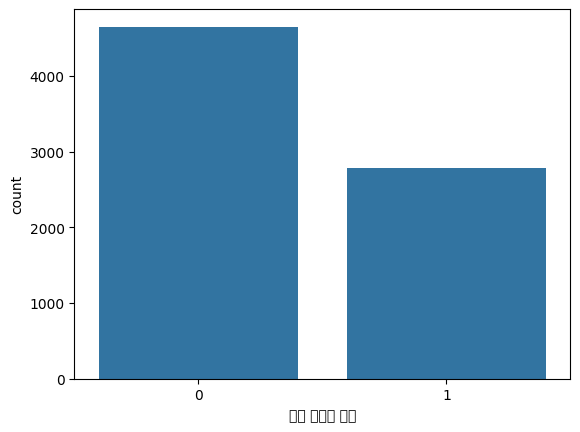

In [43]:
sns.barplot(train_no_target_vc)

채무 불이행 여부를 봤을 때 데이터 불균형이 심하진 않다. 이정도면 언더샘플링이나 오버샘플링을 일단 하지 않아도 될듯.\
모델링 했을 땐 달라질 수도 있다.

In [44]:
train_no_c

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수
0,1941337.50000,9.00000,13.40000,400597.50000,24.00000,390903.00000,225457.50000,8806.50000,767.00000,0.00000,0,1
1,1979505.00000,5.00000,15.10000,360679.50000,11.00000,1002184.50000,64749.00000,24961.50000,767.00000,0.00000,0,0
2,1356381.00000,12.00000,18.80000,491770.50000,74.00000,227775.00000,487644.00000,12069.00000,800.00000,0.00000,1,3
3,1049017.50000,15.00000,14.80000,411546.00000,22.00000,251383.50000,413211.00000,31749.00000,796.00000,0.00000,1,1
4,1601410.50000,17.00000,32.60000,1174611.00000,74.00000,252634.50000,235188.00000,3751.50000,795.00000,0.00000,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
7427,1198722.00000,10.00000,17.40000,683016.00000,25.00000,521730.00000,383376.00000,3919.50000,742.00000,0.00000,1,1
7428,1339473.00000,9.00000,18.70000,319027.50000,68.00000,126216.00000,177028.50000,6237.00000,755.00000,0.00000,0,0
7429,2297230.50000,11.00000,28.30000,399799.50000,7.00000,371907.00000,347449.50000,53301.00000,707.00000,0.00000,0,0
7430,1221523.50000,9.00000,30.10000,823305.00000,14.00000,869736.00000,176905.50000,11436.00000,733.00000,0.00000,0,0


In [45]:
train_no_c['신용 점수'].describe()

count   7432.00000
mean     744.53916
std       52.49681
min      571.00000
25%      704.00000
50%      755.00000
75%      793.00000
max      825.00000
Name: 신용 점수, dtype: float64

In [46]:
train_no_c['credit rating range'] = np.where(train_no_c['신용 점수'] > 800, 800,
                                    np.where(train_no_c['신용 점수'] > 700, 700,
                                    np.where(train_no_c['신용 점수'] > 600, 600, 500)))

In [47]:
train_no_c

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수,credit rating range
0,1941337.50000,9.00000,13.40000,400597.50000,24.00000,390903.00000,225457.50000,8806.50000,767.00000,0.00000,0,1,700
1,1979505.00000,5.00000,15.10000,360679.50000,11.00000,1002184.50000,64749.00000,24961.50000,767.00000,0.00000,0,0,700
2,1356381.00000,12.00000,18.80000,491770.50000,74.00000,227775.00000,487644.00000,12069.00000,800.00000,0.00000,1,3,700
3,1049017.50000,15.00000,14.80000,411546.00000,22.00000,251383.50000,413211.00000,31749.00000,796.00000,0.00000,1,1,700
4,1601410.50000,17.00000,32.60000,1174611.00000,74.00000,252634.50000,235188.00000,3751.50000,795.00000,0.00000,1,3,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,1198722.00000,10.00000,17.40000,683016.00000,25.00000,521730.00000,383376.00000,3919.50000,742.00000,0.00000,1,1,700
7428,1339473.00000,9.00000,18.70000,319027.50000,68.00000,126216.00000,177028.50000,6237.00000,755.00000,0.00000,0,0,700
7429,2297230.50000,11.00000,28.30000,399799.50000,7.00000,371907.00000,347449.50000,53301.00000,707.00000,0.00000,0,0,700
7430,1221523.50000,9.00000,30.10000,823305.00000,14.00000,869736.00000,176905.50000,11436.00000,733.00000,0.00000,0,0,700


In [48]:
credit_range_vc = train_no_c['credit rating range'].value_counts()

In [49]:
credit_range_vc

credit rating range
700    4905
600    1656
800     787
500      84
Name: count, dtype: int64

<Axes: xlabel='credit rating range', ylabel='count'>

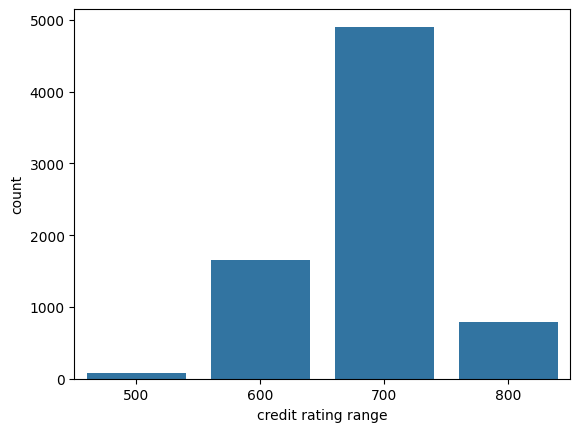

In [50]:
sns.barplot(credit_range_vc)

신용점수를 구간별로 나누어 각 구간별로 데이터가 얼마나 있는지 시각화함.\
500점대는 별로 없고, 700점대에서 가장 많다.\
그리고 그 차이는 꽤 많이난다.\
버릴지 여부는 더 시각화 해보고 정해야할듯.(일단 이상치는 제거한 상태니까)

In [51]:
train_no_copy = train_no.copy()
train_no_copy

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수,UID,주거 형태,현재 직장 근속 연수,대출 목적,대출 상환 기간,채무 불이행 여부
0,1941337.50000,9.00000,13.40000,400597.50000,24.00000,390903.00000,225457.50000,8806.50000,767.00000,0.00000,0,1,TRAIN_00000,자가,10년 이상,부채 통합,단기 상환,0
1,1979505.00000,5.00000,15.10000,360679.50000,11.00000,1002184.50000,64749.00000,24961.50000,767.00000,0.00000,0,0,TRAIN_00001,월세,10년 이상,부채 통합,단기 상환,0
2,1356381.00000,12.00000,18.80000,491770.50000,74.00000,227775.00000,487644.00000,12069.00000,800.00000,0.00000,1,3,TRAIN_00002,월세,4년,부채 통합,단기 상환,1
3,1049017.50000,15.00000,14.80000,411546.00000,22.00000,251383.50000,413211.00000,31749.00000,796.00000,0.00000,1,1,TRAIN_00003,월세,6년,부채 통합,단기 상환,1
4,1601410.50000,17.00000,32.60000,1174611.00000,74.00000,252634.50000,235188.00000,3751.50000,795.00000,0.00000,1,3,TRAIN_00006,자가,8년,부채 통합,단기 상환,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,1198722.00000,10.00000,17.40000,683016.00000,25.00000,521730.00000,383376.00000,3919.50000,742.00000,0.00000,1,1,TRAIN_09993,월세,8년,부채 통합,단기 상환,1
7428,1339473.00000,9.00000,18.70000,319027.50000,68.00000,126216.00000,177028.50000,6237.00000,755.00000,0.00000,0,0,TRAIN_09995,주택 담보 대출 (거주 중),10년 이상,부채 통합,단기 상환,0
7429,2297230.50000,11.00000,28.30000,399799.50000,7.00000,371907.00000,347449.50000,53301.00000,707.00000,0.00000,0,0,TRAIN_09996,주택 담보 대출 (거주 중),2년,주택 개보수,장기 상환,0
7430,1221523.50000,9.00000,30.10000,823305.00000,14.00000,869736.00000,176905.50000,11436.00000,733.00000,0.00000,0,0,TRAIN_09997,주택 담보 대출 (거주 중),10년 이상,부채 통합,장기 상환,0


In [52]:
train_no_copy['credit_rating_range'] = np.where(train_no_copy['신용 점수'] > 800, 800,
                                    np.where(train_no_copy['신용 점수'] > 700, 700,
                                    np.where(train_no_copy['신용 점수'] > 600, 600, 500)))

In [53]:
train_no_copy

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수,UID,주거 형태,현재 직장 근속 연수,대출 목적,대출 상환 기간,채무 불이행 여부,credit_rating_range
0,1941337.50000,9.00000,13.40000,400597.50000,24.00000,390903.00000,225457.50000,8806.50000,767.00000,0.00000,0,1,TRAIN_00000,자가,10년 이상,부채 통합,단기 상환,0,700
1,1979505.00000,5.00000,15.10000,360679.50000,11.00000,1002184.50000,64749.00000,24961.50000,767.00000,0.00000,0,0,TRAIN_00001,월세,10년 이상,부채 통합,단기 상환,0,700
2,1356381.00000,12.00000,18.80000,491770.50000,74.00000,227775.00000,487644.00000,12069.00000,800.00000,0.00000,1,3,TRAIN_00002,월세,4년,부채 통합,단기 상환,1,700
3,1049017.50000,15.00000,14.80000,411546.00000,22.00000,251383.50000,413211.00000,31749.00000,796.00000,0.00000,1,1,TRAIN_00003,월세,6년,부채 통합,단기 상환,1,700
4,1601410.50000,17.00000,32.60000,1174611.00000,74.00000,252634.50000,235188.00000,3751.50000,795.00000,0.00000,1,3,TRAIN_00006,자가,8년,부채 통합,단기 상환,1,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,1198722.00000,10.00000,17.40000,683016.00000,25.00000,521730.00000,383376.00000,3919.50000,742.00000,0.00000,1,1,TRAIN_09993,월세,8년,부채 통합,단기 상환,1,700
7428,1339473.00000,9.00000,18.70000,319027.50000,68.00000,126216.00000,177028.50000,6237.00000,755.00000,0.00000,0,0,TRAIN_09995,주택 담보 대출 (거주 중),10년 이상,부채 통합,단기 상환,0,700
7429,2297230.50000,11.00000,28.30000,399799.50000,7.00000,371907.00000,347449.50000,53301.00000,707.00000,0.00000,0,0,TRAIN_09996,주택 담보 대출 (거주 중),2년,주택 개보수,장기 상환,0,700
7430,1221523.50000,9.00000,30.10000,823305.00000,14.00000,869736.00000,176905.50000,11436.00000,733.00000,0.00000,0,0,TRAIN_09997,주택 담보 대출 (거주 중),10년 이상,부채 통합,장기 상환,0,700


In [56]:
train_no_copy_500 = train_no_copy.query('credit_rating_range == 500')
train_no_copy_600 = train_no_copy.query('credit_rating_range == 600')
train_no_copy_700 = train_no_copy.query('credit_rating_range == 700')
train_no_copy_800 = train_no_copy.query('credit_rating_range == 800')

In [58]:
train_no_copy_700

,연간 소득,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,마지막 연체 이후 경과 개월 수,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,체납 세금 압류 횟수,신용 문제 발생 횟수,개인 파산 횟수,UID,주거 형태,현재 직장 근속 연수,대출 목적,대출 상환 기간,채무 불이행 여부,credit_rating_range
0,1941337.50000,9.00000,13.40000,400597.50000,24.00000,390903.00000,225457.50000,8806.50000,767.00000,0.00000,0,1,TRAIN_00000,자가,10년 이상,부채 통합,단기 상환,0,700
1,1979505.00000,5.00000,15.10000,360679.50000,11.00000,1002184.50000,64749.00000,24961.50000,767.00000,0.00000,0,0,TRAIN_00001,월세,10년 이상,부채 통합,단기 상환,0,700
2,1356381.00000,12.00000,18.80000,491770.50000,74.00000,227775.00000,487644.00000,12069.00000,800.00000,0.00000,1,3,TRAIN_00002,월세,4년,부채 통합,단기 상환,1,700
3,1049017.50000,15.00000,14.80000,411546.00000,22.00000,251383.50000,413211.00000,31749.00000,796.00000,0.00000,1,1,TRAIN_00003,월세,6년,부채 통합,단기 상환,1,700
4,1601410.50000,17.00000,32.60000,1174611.00000,74.00000,252634.50000,235188.00000,3751.50000,795.00000,0.00000,1,3,TRAIN_00006,자가,8년,부채 통합,단기 상환,1,700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7425,1294200.00000,13.00000,17.50000,266356.50000,7.00000,262972.50000,12522.00000,6700.50000,798.00000,5.00000,0,0,TRAIN_09991,자가,2년,주택 개보수,단기 상환,0,700
7427,1198722.00000,10.00000,17.40000,683016.00000,25.00000,521730.00000,383376.00000,3919.50000,742.00000,0.00000,1,1,TRAIN_09993,월세,8년,부채 통합,단기 상환,1,700
7428,1339473.00000,9.00000,18.70000,319027.50000,68.00000,126216.00000,177028.50000,6237.00000,755.00000,0.00000,0,0,TRAIN_09995,주택 담보 대출 (거주 중),10년 이상,부채 통합,단기 상환,0,700
7429,2297230.50000,11.00000,28.30000,399799.50000,7.00000,371907.00000,347449.50000,53301.00000,707.00000,0.00000,0,0,TRAIN_09996,주택 담보 대출 (거주 중),2년,주택 개보수,장기 상환,0,700


Text(0.5, 1.0, 'rating 800')

C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\jayiu\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\ja

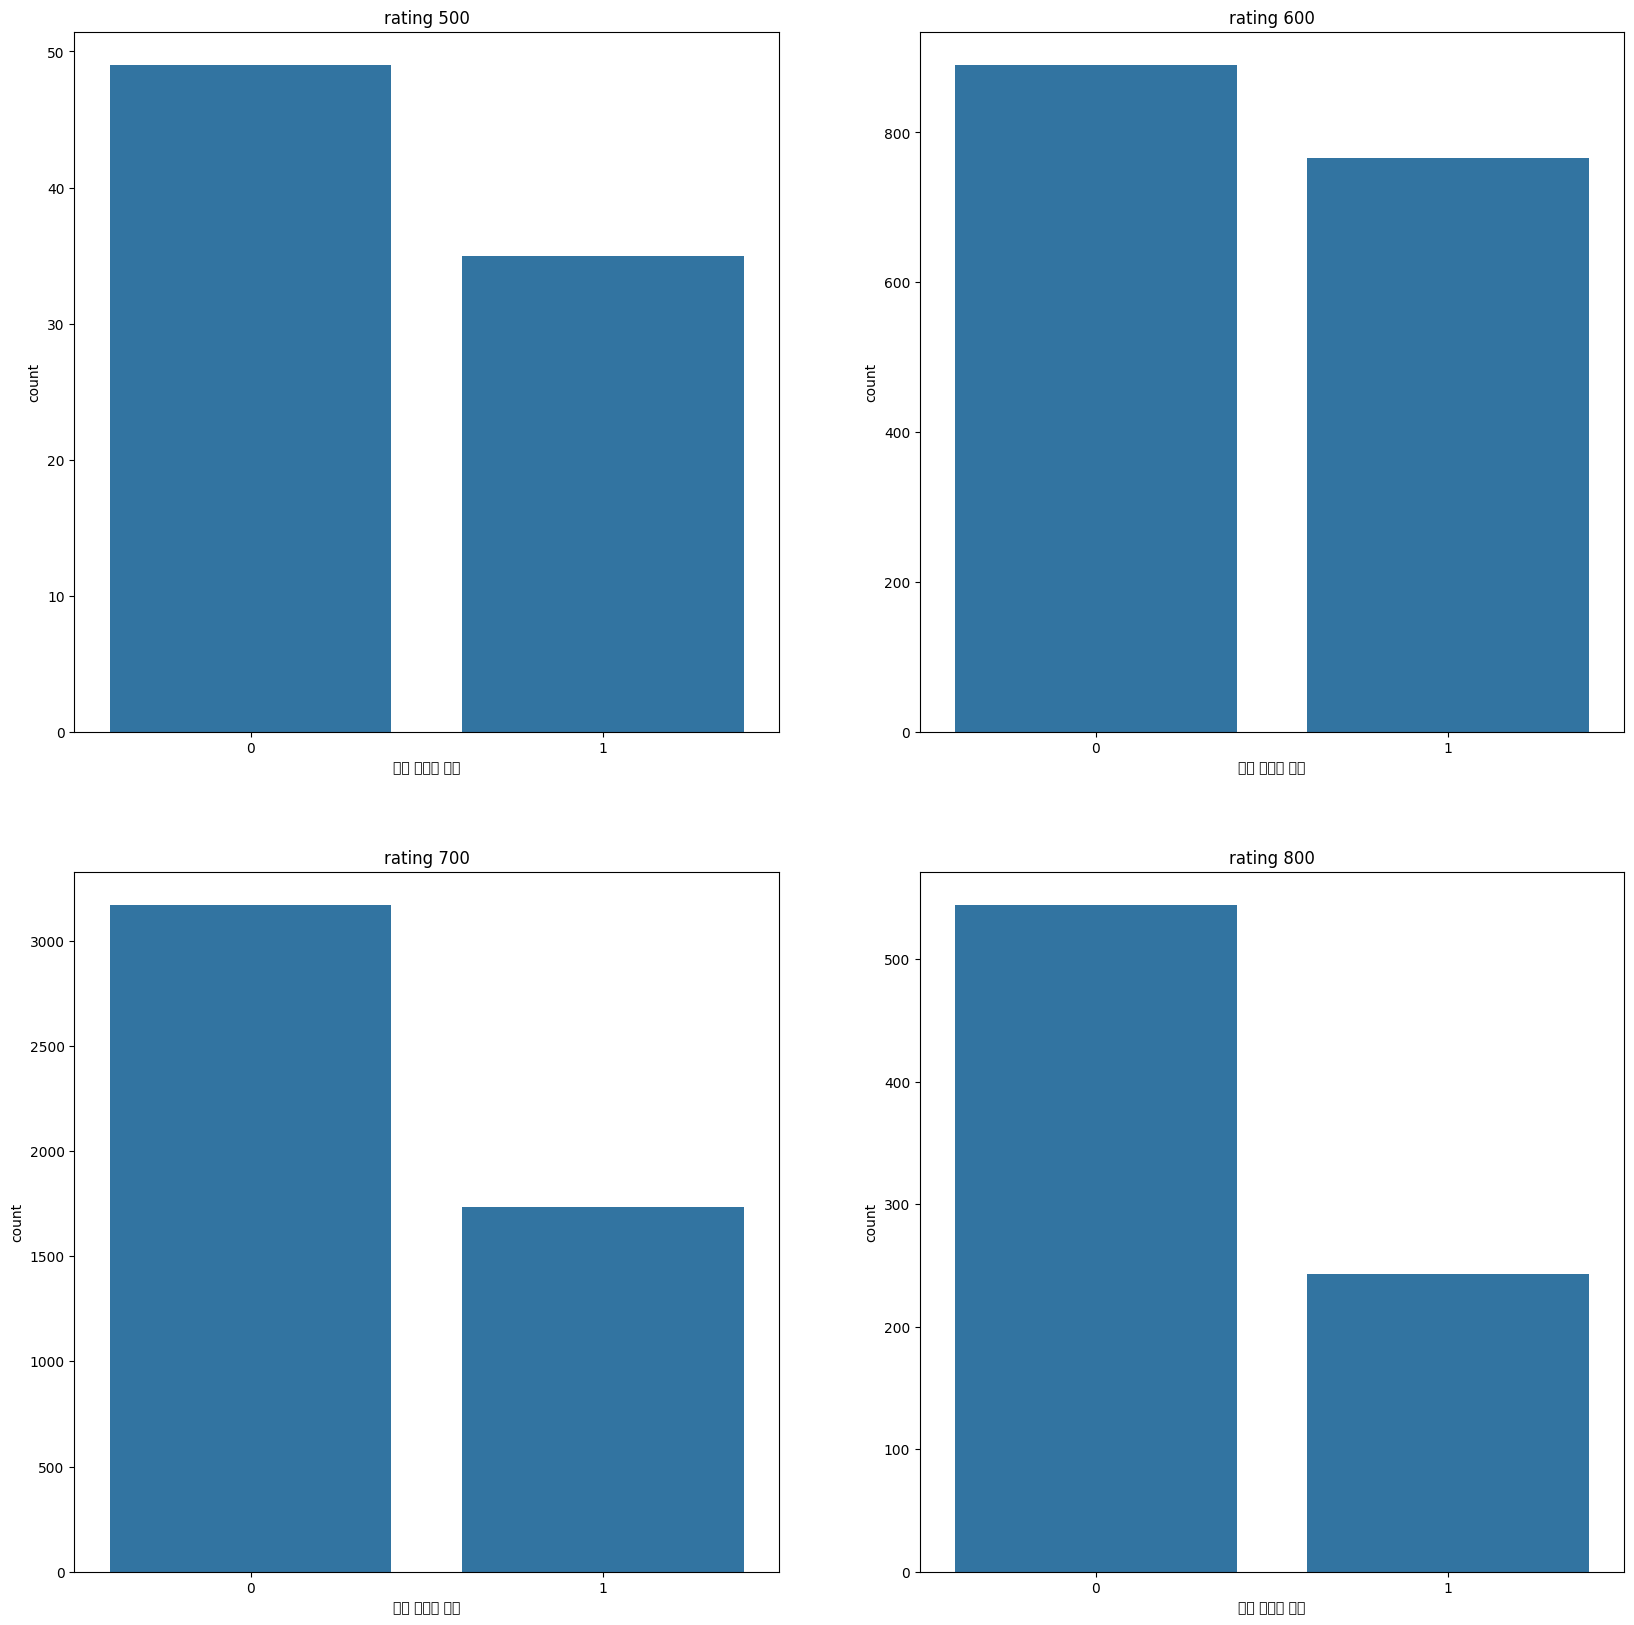

In [62]:
fig, axes = plt.subplots(2, 2, figsize = (20, 20))
sns.barplot(train_no_copy_500['채무 불이행 여부'].value_counts(), ax = axes[0, 0])
axes[0, 0].set_title('rating 500')
sns.barplot(train_no_copy_600['채무 불이행 여부'].value_counts(), ax = axes[0, 1])
axes[0, 1].set_title('rating 600')
sns.barplot(train_no_copy_700['채무 불이행 여부'].value_counts(), ax = axes[1, 0])
axes[1, 0].set_title('rating 700')
sns.barplot(train_no_copy_800['채무 불이행 여부'].value_counts(), ax = axes[1, 1])
axes[1, 1].set_title('rating 800')